In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv(r"D:\Machine Learning Development\original\Machine-Learning-Pipeline-Overview\train.csv")
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
data.shape

(1460, 81)

In [11]:
variables_with_null = [i for i in data.columns if data[i].isnull().sum() >0]

data[variables_with_null].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

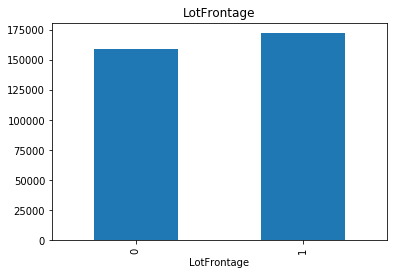

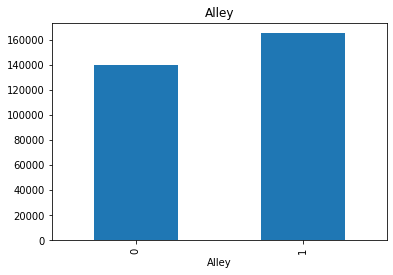

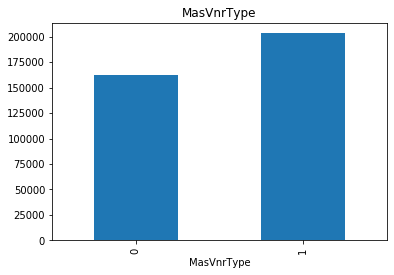

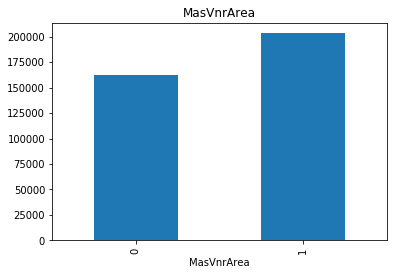

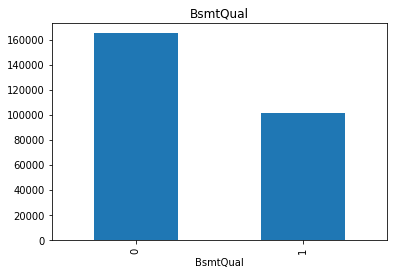

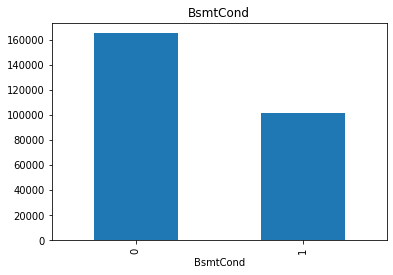

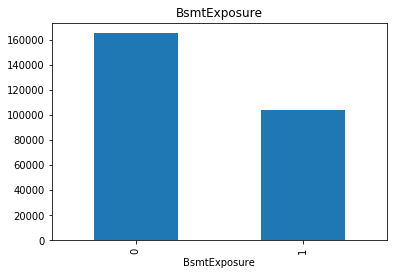

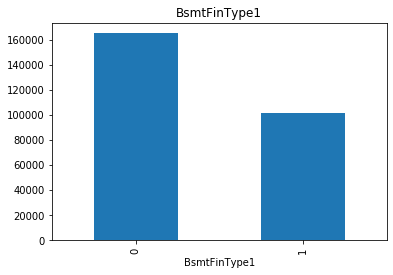

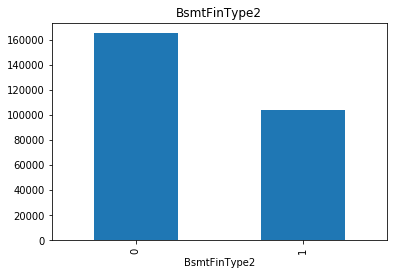

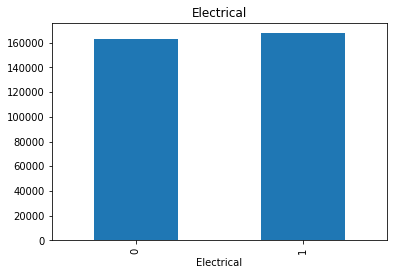

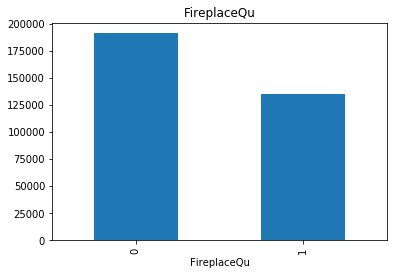

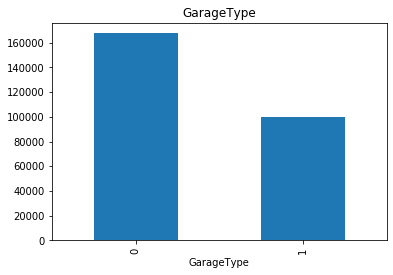

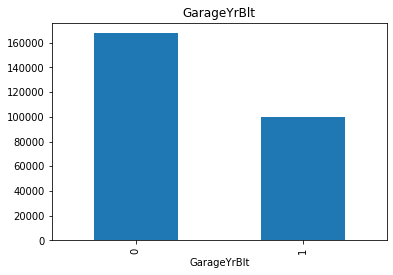

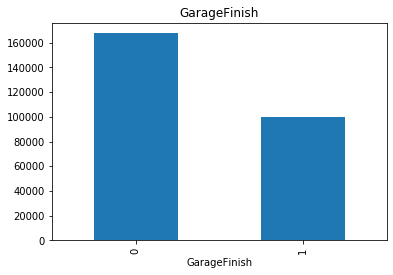

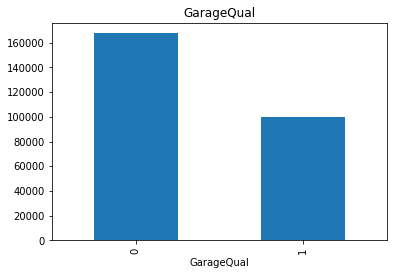

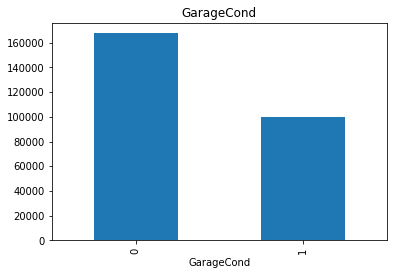

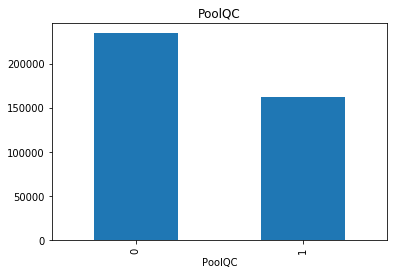

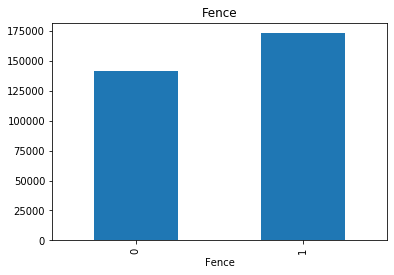

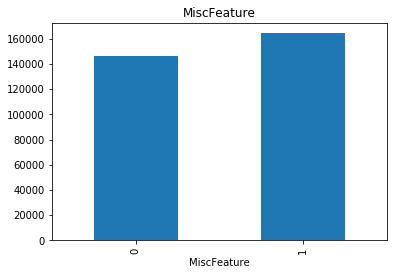

In [13]:
def analyze_na_value(df, var):
    df = df.copy()
    
    df[var] = np.where(df[var].isnull(),1,0)
    df.groupby(var)['SalePrice'].median().plot.bar()
    
    plt.title(var)
    
    plt.show()
    
for var in variables_with_null:
    analyze_na_value(data,var)

In [14]:
numerical_variables = [i for i in data.columns if data[i].dtypes != 'O' ]

print('Number of Numerical Variables : ',len(numerical_variables))

Number of Numerical Variables :  38


In [18]:
year_variables = [i for i in data.columns if 'Year' in i or 'Yr' in i]
year_variables

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'CHange in House price with the years')

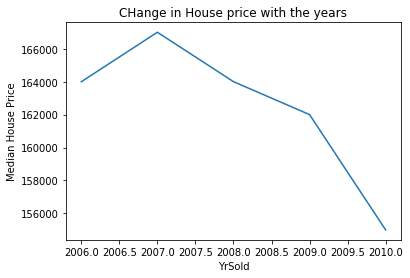

In [20]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('CHange in House price with the years')